In [1]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt

In [2]:
from src.data import load_data

inp_seq_len = 12
out_seq_len = 2
train_ds, test_ds = load_data(inp_seq_len, out_seq_len, "./data")
x, y = train_ds[0]
inp_features = train_ds.columns.tolist()
out_features = ["count"]
countries = train_ds.countries

for country in countries:
    test_ds.set_country(country)
    test_ds._validate_self()
test_ds.set_country(None)


In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from src.infer import ForecastModel, collate_fn

model = ForecastModel(inp_features, out_features, inp_seq_len, out_seq_len)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
train_ds.set_country(None); test_ds.set_country(None)
train_dl = DataLoader(train_ds, shuffle=True, batch_size=1, collate_fn=collate_fn)
test_dl = DataLoader(test_ds, shuffle=True, batch_size=1, collate_fn=collate_fn)

In [4]:
len(test_ds)

78

In [5]:
from src.train import start as train
epochs = 2
tollerance=30
train(model, optimizer, loss_fn, train_dl, test_dl, n_epochs=epochs, tollerance=tollerance)

/home/avishka/anaconda3/envs/xgboost/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/2 [00:00<?, ?it/s]/home/avishka/anaconda3/envs/xgboost/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2, 1])) that is different to the input size (torch.Size([2, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 2/2 [00:01<00:00,  1.05it/s, train_rmse=0.101, test_rmse=0.072] 


---- Artifacts saved at /media/avishka/New Volume/Personal/TouristForecast/backend/experiments/runs/forecast5 ----


---- Loading best state dicts at epoch 71 ----


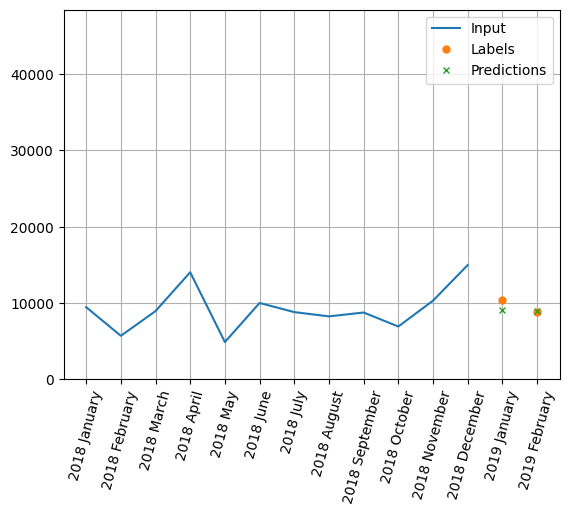

In [6]:
from src.infer import load_run
from src.data import load_data
import matplotlib.pyplot as plt

model, optimizer, model_details = load_run("./runs/forecast4")
normalize_para = model_details["data"]["normalize_para"]
train_ds, test_ds = load_data(model_details["inp_seq_len"], model_details["out_seq_len"], "./data", normalize_para=normalize_para)
x, y = train_ds[0]
date = train_ds.get_date(0)
fig, ax = plt.subplots()
model.plot(x,y,date,normalize_para, ax)
plt.show()

In [1]:
from src.data import load_dataset
from src.infer import load_model, get_counts


ds = load_dataset("/media/avishka/New Volume/Personal/TouristForecast/backend/app/data")
model = load_model("/media/avishka/New Volume/Personal/TouristForecast/backend/app/model")

counts = get_counts("AUSTRALIA", "January", 2023, 5, ds, model)
counts

{'date': ['2023 January', '2023 February'],
 'count': [1338, 4777],
 'predicted': [0, 0]}

In [4]:
event = {
    "country": "AUSTRALIA",
    "month": "January",
    "year":2023,
    "n_months":5
}



True